In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
import requests
from tqdm import tqdm
import os
from skimage import color

In [2]:
# Define the classification criteria
criteria_lab = {
    'warm': np.array([63.45, 11.80, 17.11]),
    'cool': np.array([64.80, 10.87, 15.04])
}

criteria_rgb = {
    'spring': np.array([253.75, 153.55, 152]),
    'summer': np.array([254, 291.25, 164.5]),
    'fall': np.array([240.75, 199.25, 132.75]),
    'winter': np.array([240, 201.5, 129.5])
}

# Function to compute cosine similarity
def compute_cosine_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

# Function to classify skin type
def classify_skin_type(pixel):
    pixel_lab = color.rgb2lab(np.array([pixel])/255.0) # Convert to LAB space
    pixel_rgb = pixel
    similarities_lab = np.array([compute_cosine_sim(pixel_lab[0], tone) for tone in criteria_lab.values()])
    primary_class = ['warm', 'cool'][np.argmax(similarities_lab)]

    if primary_class == 'warm':
        secondary_class = ['spring', 'fall'][np.argmax([compute_cosine_sim(pixel_rgb, criteria_rgb['spring']),
                                                        compute_cosine_sim(pixel_rgb, criteria_rgb['fall'])])]
    else:
        secondary_class = ['summer', 'winter'][np.argmax([compute_cosine_sim(pixel_rgb, criteria_rgb['summer']),
                                                          compute_cosine_sim(pixel_rgb, criteria_rgb['winter'])])]
    return primary_class, secondary_class

# 웜톤 확인

100%|██████████| 224/224 [00:04<00:00, 45.65it/s]


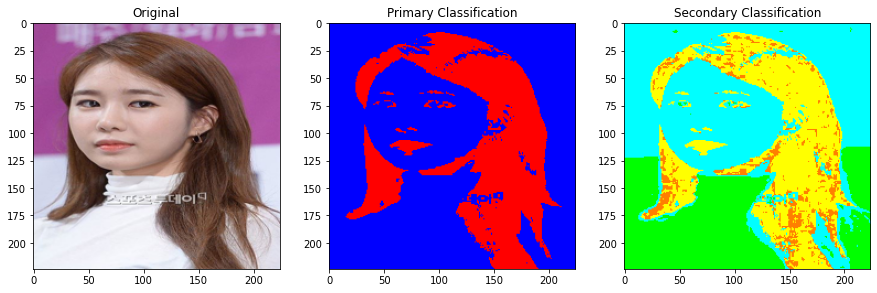

100%|██████████| 224/224 [00:04<00:00, 45.09it/s]


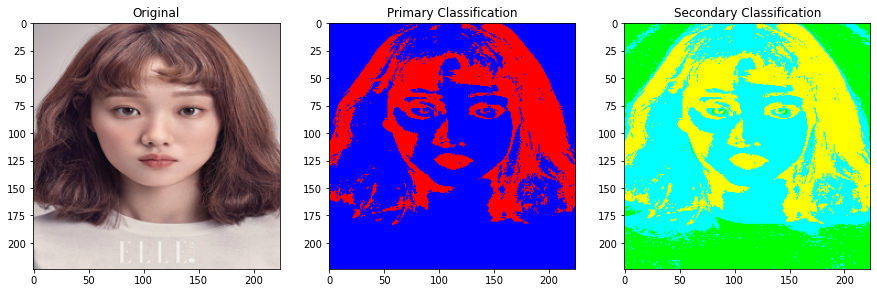

100%|██████████| 224/224 [00:05<00:00, 43.45it/s]


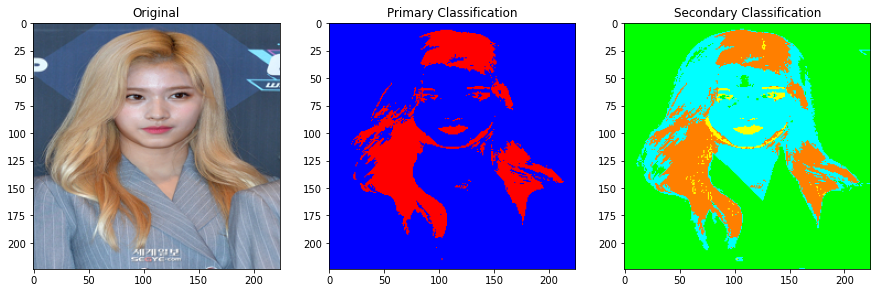

 55%|█████▌    | 124/224 [00:02<00:02, 46.00it/s]/tmp/ipykernel_47/954178668.py:16: RuntimeWarning: invalid value encountered in double_scalars
  return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
100%|██████████| 224/224 [00:05<00:00, 43.99it/s]


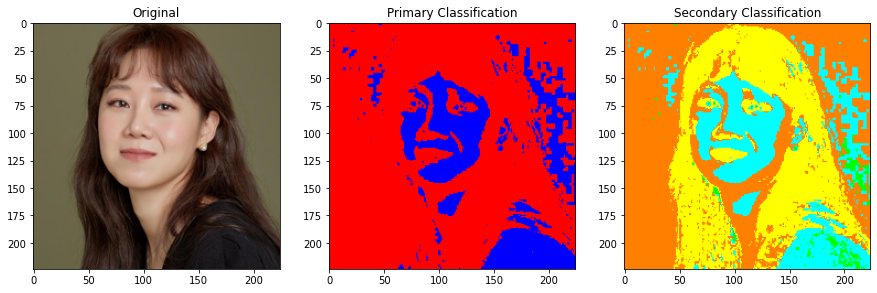

100%|██████████| 224/224 [00:05<00:00, 44.73it/s]


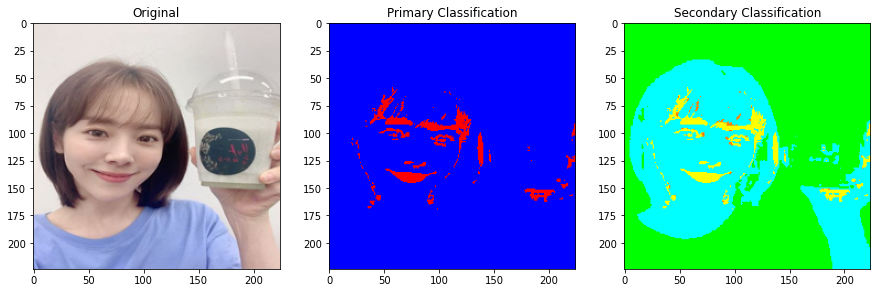

100%|██████████| 224/224 [00:05<00:00, 44.73it/s]


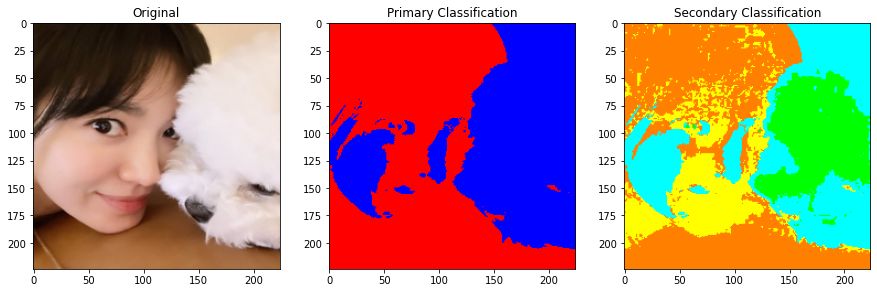

100%|██████████| 224/224 [00:05<00:00, 43.78it/s]


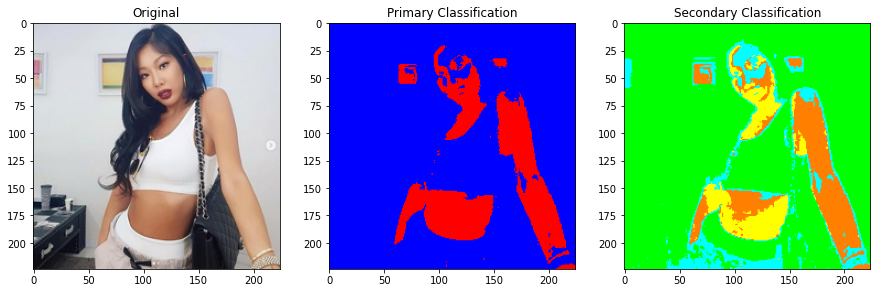

100%|██████████| 224/224 [00:05<00:00, 42.56it/s]


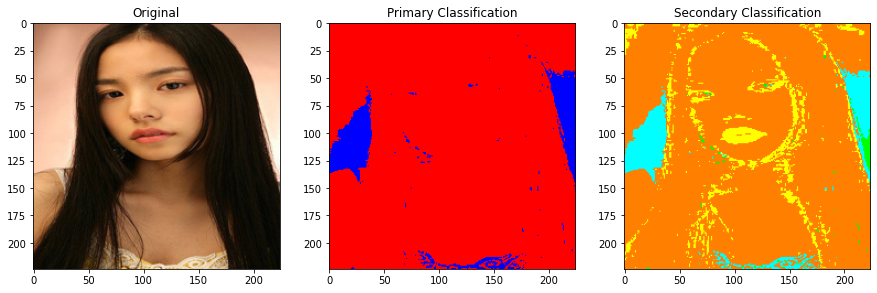

100%|██████████| 224/224 [00:05<00:00, 42.38it/s]


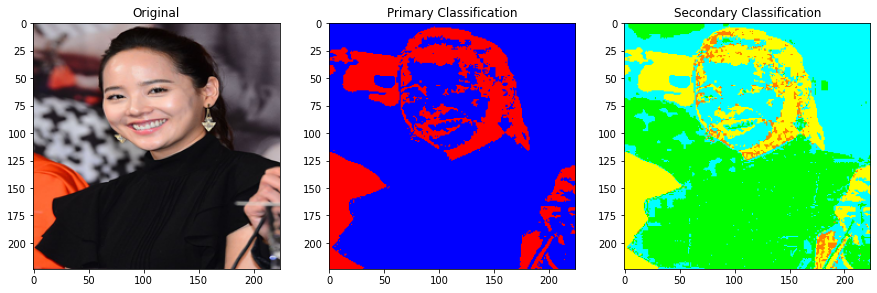

100%|██████████| 224/224 [00:05<00:00, 44.53it/s]


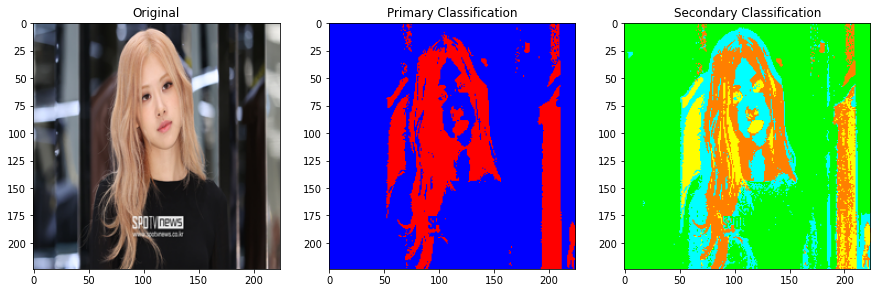

In [3]:
# Specify the file path
directory = os.getenv('HOME')+'/aiffel/project/aiffelthon/images/warm/'

# Get all jpg files in the specified directory
files = [f for f in os.listdir(directory) if f.endswith('.jpg')]

# Select only the first 50 files
files = files[:10]

# Define the color maps
color_map_primary = {
    "warm": [255, 0, 0], # Red for warm
    "cool": [0, 0, 255]  # Blue for cool
}

color_map_secondary = {
    "spring": [255, 255, 0], # Yellow for spring
    "summer": [0, 255, 0],   # Green for summer
    "fall": [255, 127, 0],   # Orange for fall
    "winter": [0, 255, 255]  # Cyan for winter
}

for file in files:
    file_path = os.path.join(directory, file)
    
    # Load and resize the image
    image = Image.open(file_path).resize((224, 224))
    image_np = np.array(image)

    height, width, _ = image_np.shape
    results_primary = np.zeros_like(image_np, dtype='uint8')
    results_secondary = np.zeros_like(image_np, dtype='uint8')

    for j in tqdm(range(height)):
        for i in range(width):
            current_pixel = image_np[j, i]
            primary_class, secondary_class = classify_skin_type(current_pixel)
            results_primary[j, i] = color_map_primary[primary_class]
            results_secondary[j, i] = color_map_secondary[secondary_class]

    # Create a new figure
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    # Add the original image to the first subplot
    ax[0].imshow(image_np)
    ax[0].set_title('Original')

    # Add the primary classified image to the second subplot
    ax[1].imshow(results_primary)
    ax[1].set_title('Primary Classification')

    # Add the secondary classified image to the third subplot
    ax[2].imshow(results_secondary)
    ax[2].set_title('Secondary Classification')

    # Display the plot
    plt.show()


# 쿨톤 확인

100%|██████████| 224/224 [00:05<00:00, 44.34it/s]


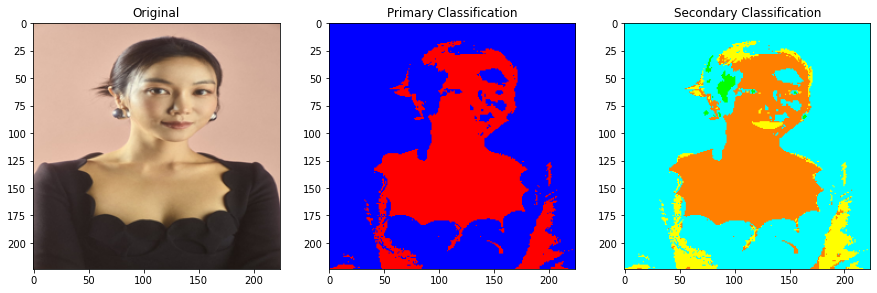

100%|██████████| 224/224 [00:04<00:00, 45.60it/s]


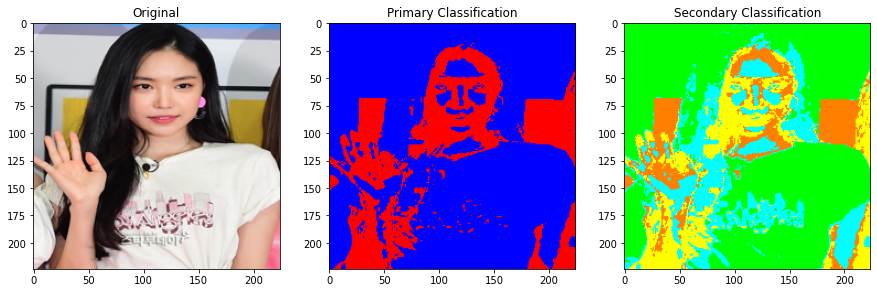

 51%|█████▏    | 115/224 [00:02<00:02, 45.16it/s]/tmp/ipykernel_47/954178668.py:16: RuntimeWarning: invalid value encountered in double_scalars
  return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
100%|██████████| 224/224 [00:05<00:00, 44.30it/s]


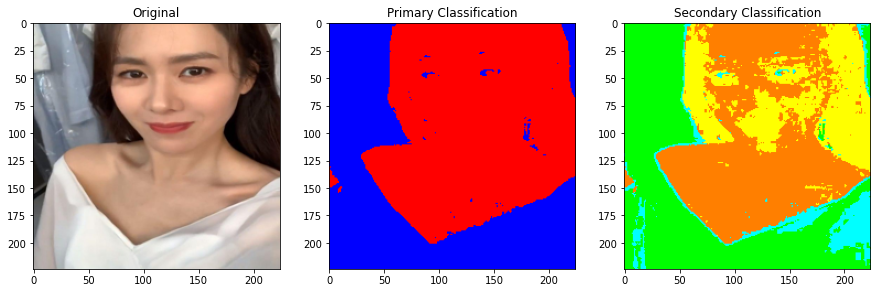

100%|██████████| 224/224 [00:05<00:00, 43.80it/s]


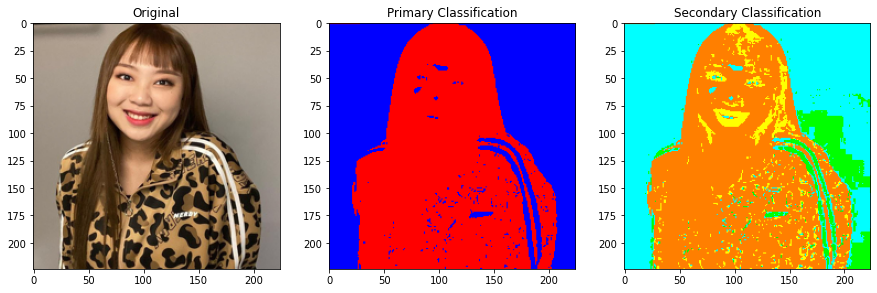

100%|██████████| 224/224 [00:05<00:00, 44.31it/s]


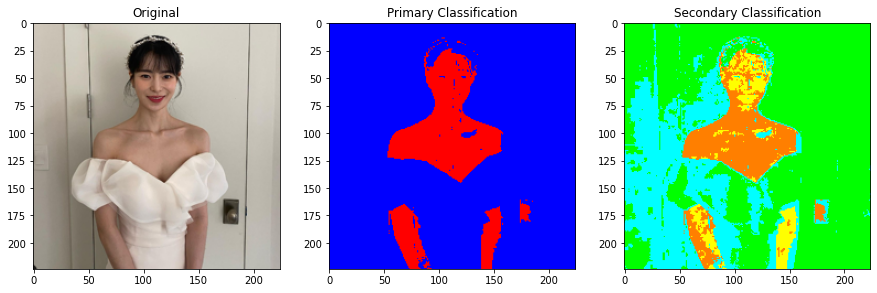

100%|██████████| 224/224 [00:05<00:00, 42.78it/s]


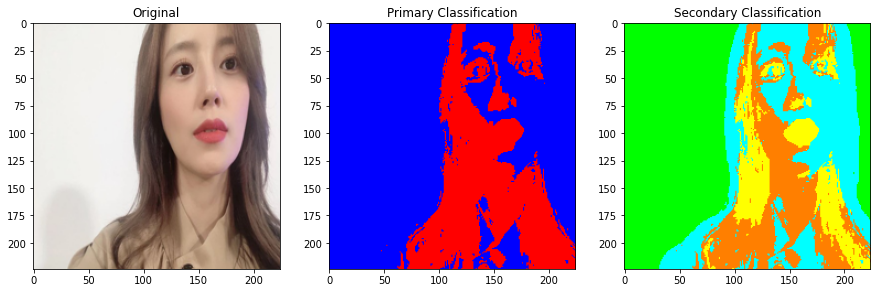

100%|██████████| 224/224 [00:05<00:00, 44.50it/s]


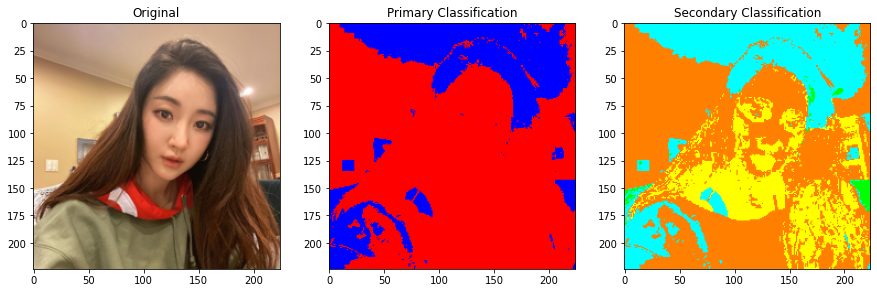

100%|██████████| 224/224 [00:05<00:00, 43.96it/s]


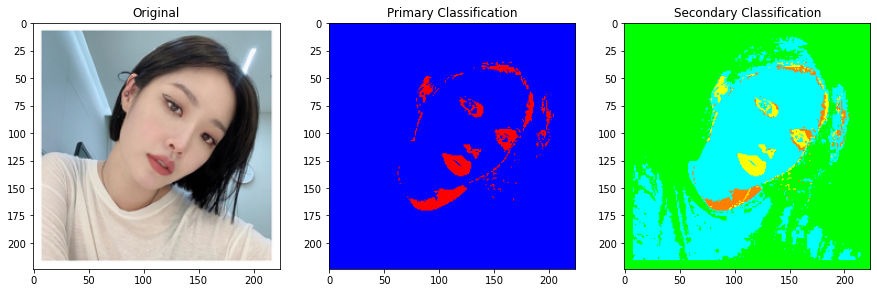

100%|██████████| 224/224 [00:05<00:00, 44.50it/s]


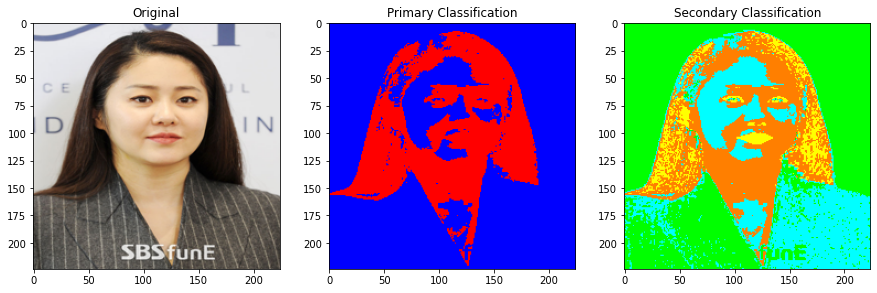

100%|██████████| 224/224 [00:04<00:00, 45.20it/s]


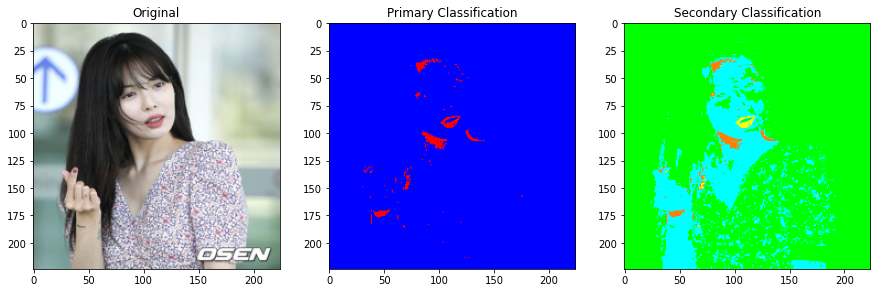

In [4]:
# Specify the file path
directory = os.getenv('HOME')+'/aiffel/project/aiffelthon/images/cool/'

# Get all jpg files in the specified directory
files = [f for f in os.listdir(directory) if f.endswith('.jpg')]

# Select only the first 50 files
files = files[:10]

# Define the color maps
color_map_primary = {
    "warm": [255, 0, 0], # Red for warm
    "cool": [0, 0, 255]  # Blue for cool
}

color_map_secondary = {
    "spring": [255, 255, 0], # Yellow for spring
    "summer": [0, 255, 0],   # Green for summer
    "fall": [255, 127, 0],   # Orange for fall
    "winter": [0, 255, 255]  # Cyan for winter
}

for file in files:
    file_path = os.path.join(directory, file)
    
    # Load and resize the image
    image = Image.open(file_path).resize((224, 224))
    image_np = np.array(image)

    height, width, _ = image_np.shape
    results_primary = np.zeros_like(image_np, dtype='uint8')
    results_secondary = np.zeros_like(image_np, dtype='uint8')

    for j in tqdm(range(height)):
        for i in range(width):
            current_pixel = image_np[j, i]
            primary_class, secondary_class = classify_skin_type(current_pixel)
            results_primary[j, i] = color_map_primary[primary_class]
            results_secondary[j, i] = color_map_secondary[secondary_class]

    # Create a new figure
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    # Add the original image to the first subplot
    ax[0].imshow(image_np)
    ax[0].set_title('Original')

    # Add the primary classified image to the second subplot
    ax[1].imshow(results_primary)
    ax[1].set_title('Primary Classification')

    # Add the secondary classified image to the third subplot
    ax[2].imshow(results_secondary)
    ax[2].set_title('Secondary Classification')

    # Display the plot
    plt.show()


# 일반인 이미지

100%|██████████| 224/224 [00:05<00:00, 43.72it/s]


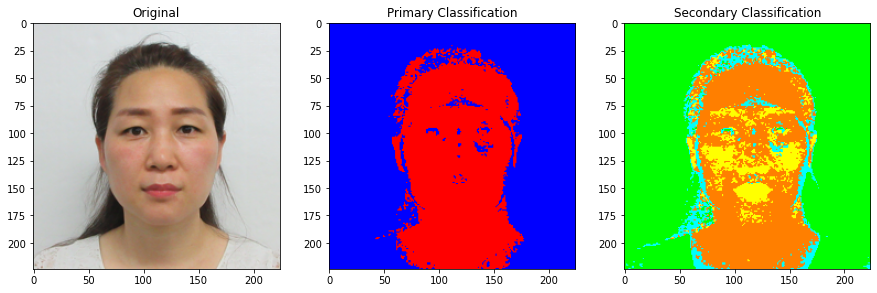

100%|██████████| 224/224 [00:05<00:00, 43.45it/s]


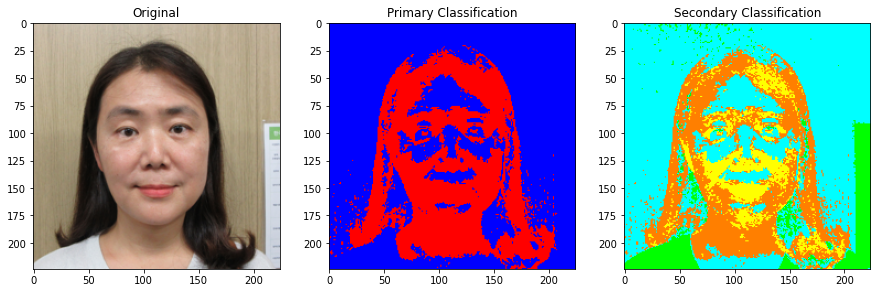

100%|██████████| 224/224 [00:05<00:00, 42.18it/s]


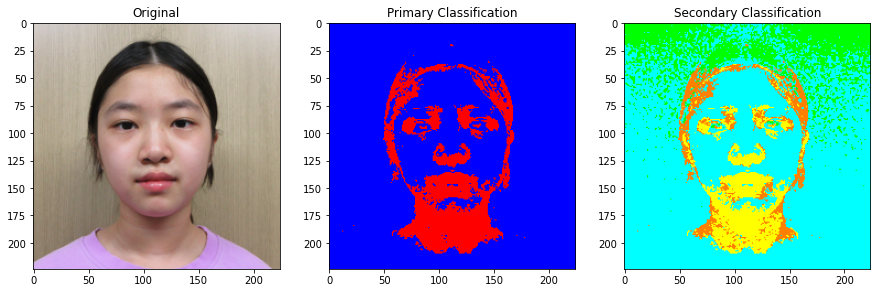

100%|██████████| 224/224 [00:05<00:00, 43.43it/s]


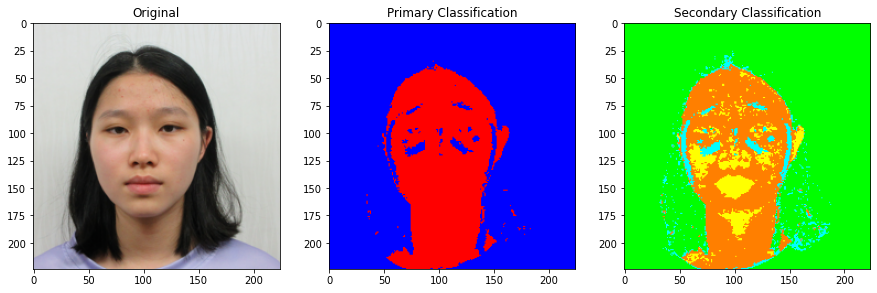

100%|██████████| 224/224 [00:05<00:00, 42.91it/s]


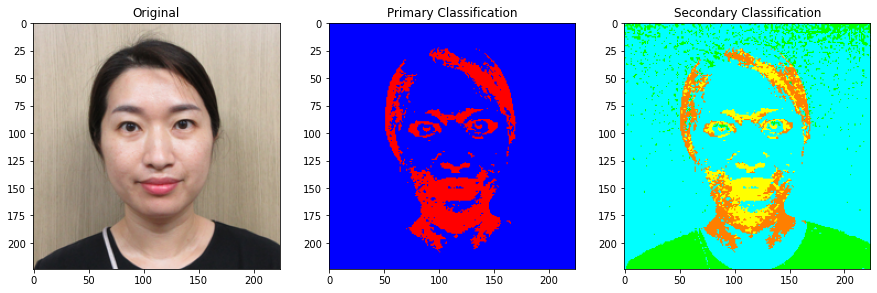

100%|██████████| 224/224 [00:05<00:00, 43.22it/s]


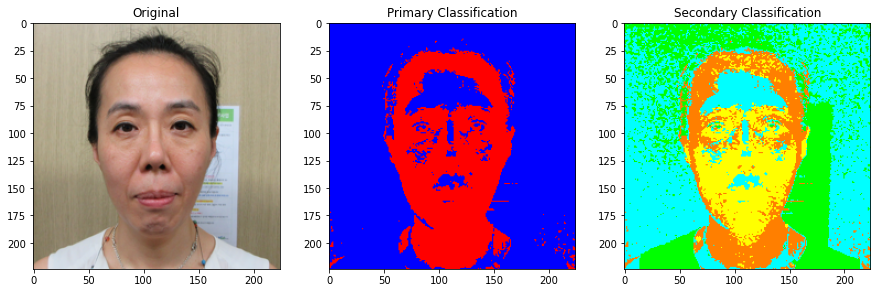

100%|██████████| 224/224 [00:05<00:00, 44.33it/s]


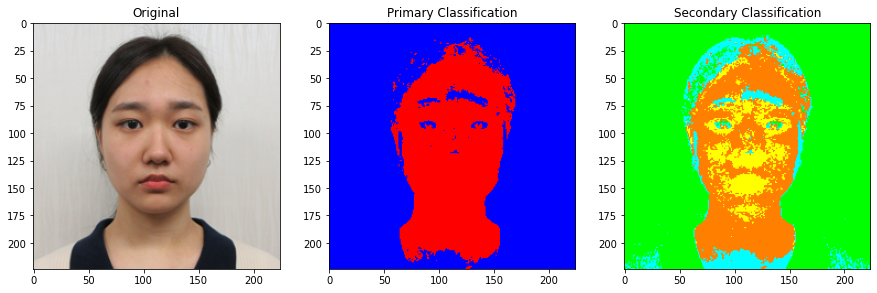

100%|██████████| 224/224 [00:05<00:00, 41.70it/s]


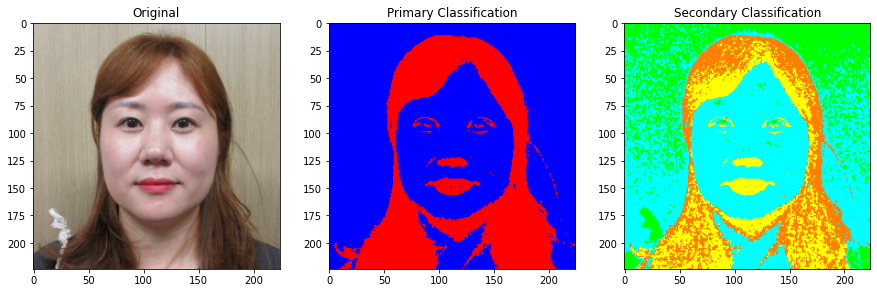

100%|██████████| 224/224 [00:05<00:00, 42.24it/s]


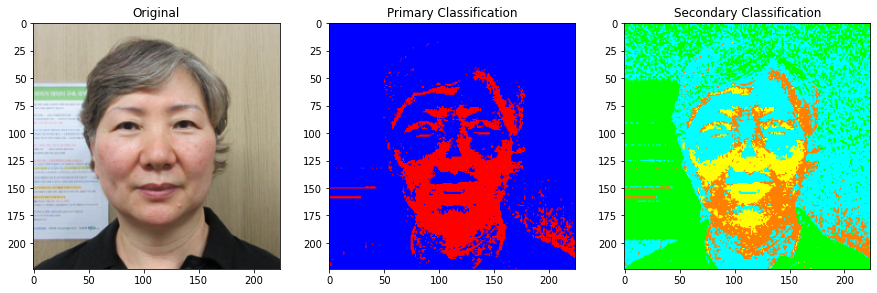

100%|██████████| 224/224 [00:05<00:00, 43.28it/s]


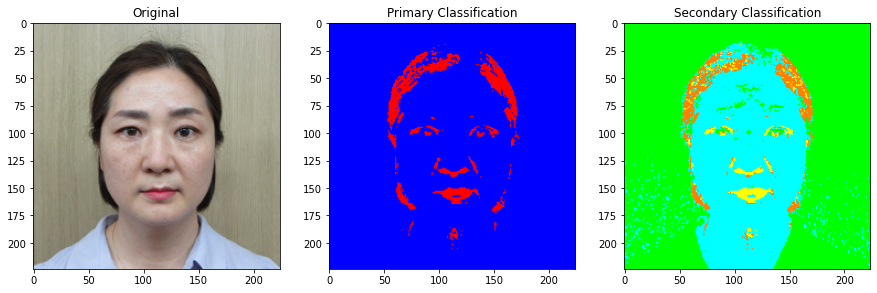

In [20]:
# Specify the file path
directory = os.getenv('HOME')+'/aiffel/project/aiffelthon/images/test/라벨링용일반인100장/'

# Get all jpg files in the specified directory
files = [f for f in os.listdir(directory) if f.endswith('05.JPG')]

# # Select only the first 50 files
files = files[:10]

# Define the color maps
color_map_primary = {
    "warm": [255, 0, 0], # Red for warm
    "cool": [0, 0, 255]  # Blue for cool
}

color_map_secondary = {
    "spring": [255, 255, 0], # Yellow for spring
    "summer": [0, 255, 0],   # Green for summer
    "fall": [255, 127, 0],   # Orange for fall
    "winter": [0, 255, 255]  # Cyan for winter
}

for file in files:
    file_path = os.path.join(directory, file)
    
    # Load and resize the image
    image = Image.open(file_path).resize((224, 224))
    image_np = np.array(image)

    height, width, _ = image_np.shape
    results_primary = np.zeros_like(image_np, dtype='uint8')
    results_secondary = np.zeros_like(image_np, dtype='uint8')

    for j in tqdm(range(height)):
        for i in range(width):
            current_pixel = image_np[j, i]
            primary_class, secondary_class = classify_skin_type(current_pixel)
            results_primary[j, i] = color_map_primary[primary_class]
            results_secondary[j, i] = color_map_secondary[secondary_class]

    # Create a new figure
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    # Add the original image to the first subplot
    ax[0].imshow(image_np)
    ax[0].set_title('Original')

    # Add the primary classified image to the second subplot
    ax[1].imshow(results_primary)
    ax[1].set_title('Primary Classification')

    # Add the secondary classified image to the third subplot
    ax[2].imshow(results_secondary)
    ax[2].set_title('Secondary Classification')

    # Display the plot
    plt.show()

# LAB + RGB 값을 이용한 레이블링

- 얼굴만 인식해서, 얼굴 전체의 픽셀 별 클래스 분류 최빈값으로 대표 색상 정하기

## 1. dlib을 이용한 레이블 분류

In [7]:
!pip install dlib
!pip install opencv-python

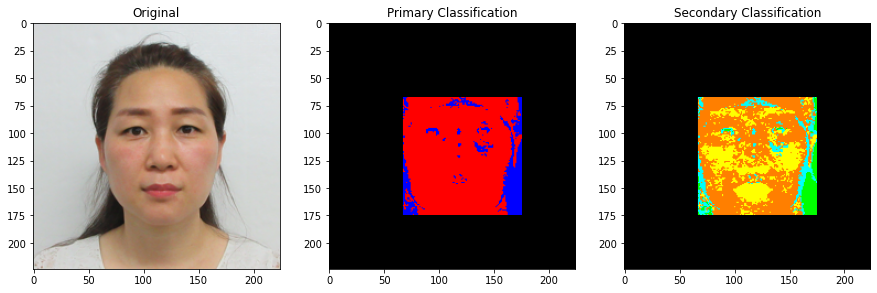

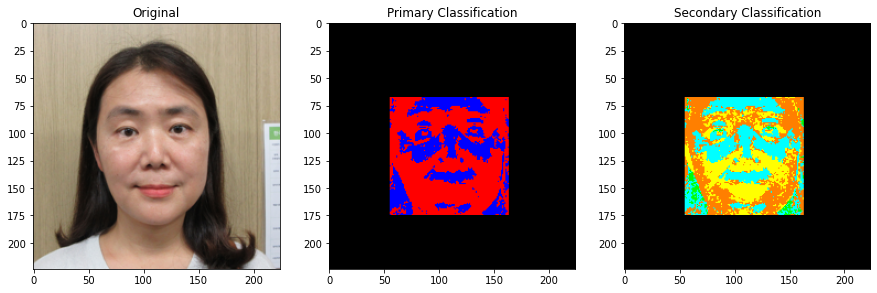

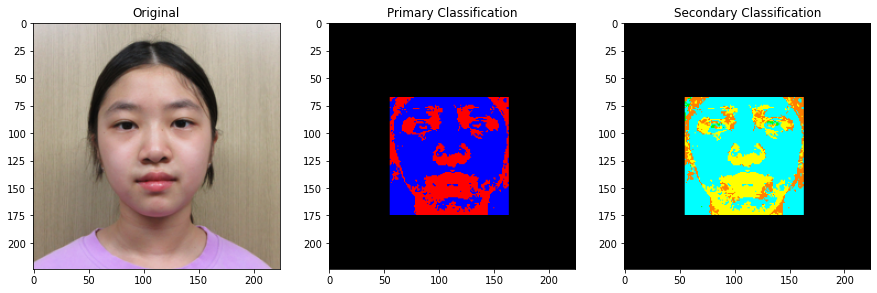

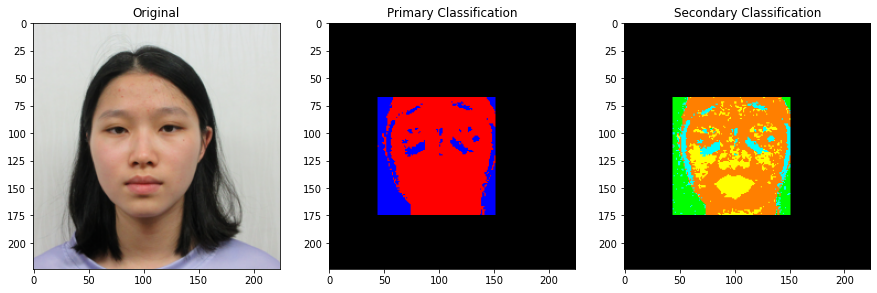

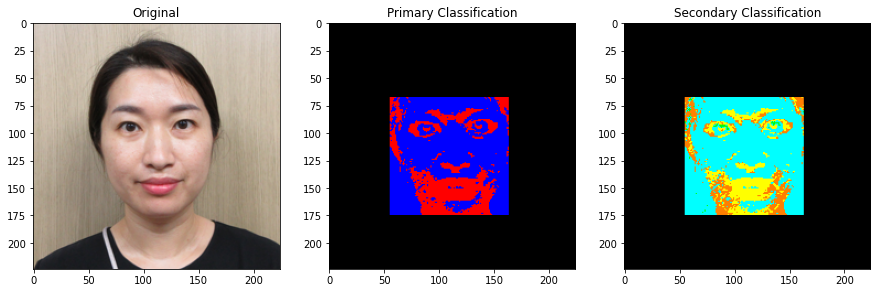

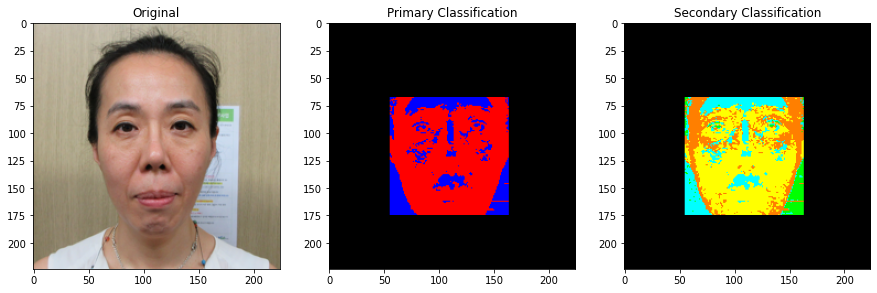

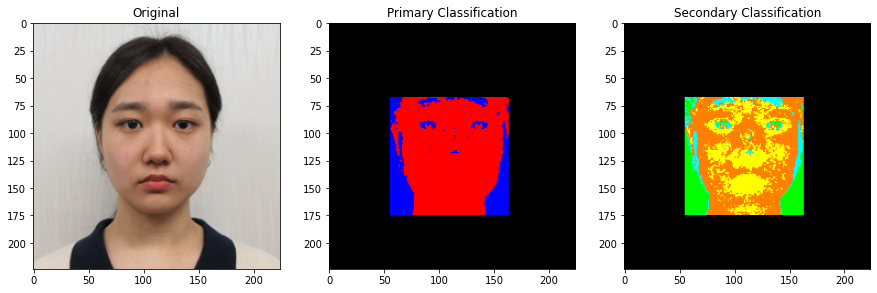

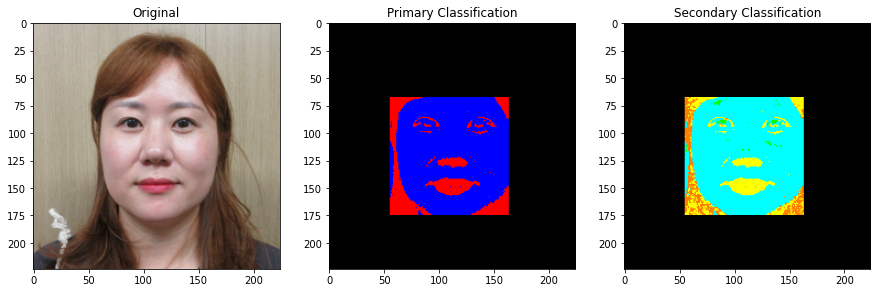

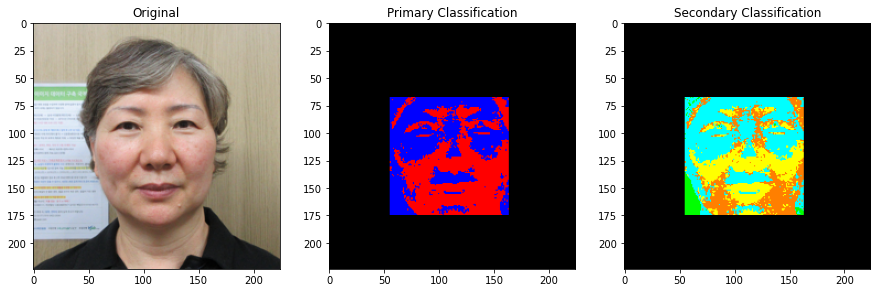

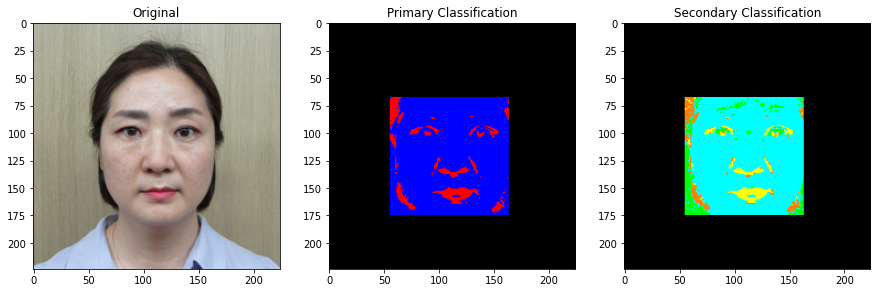

In [21]:
import dlib
import cv2

# Initialize dlib's face detector
detector = dlib.get_frontal_face_detector()

for file in files:
    file_path = os.path.join(directory, file)
    
    # Load and resize the image
    image = Image.open(file_path).resize((224, 224))
    image_np = np.array(image)

    # Detect faces in the image
    faces = detector(image_np, 1)

    # Initialize the result images
    results_primary = np.zeros_like(image_np, dtype='uint8')
    results_secondary = np.zeros_like(image_np, dtype='uint8')

    for face in faces:
        # Loop over the pixels in the face region
        for j in range(face.top(), face.bottom()):
            for i in range(face.left(), face.right()):
                # Ensure the pixel coordinates are within the bounds of the image
                if j < 0 or i < 0 or j >= height or i >= width:
                    continue

                current_pixel = image_np[j, i]
                primary_class, secondary_class = classify_skin_type(current_pixel)
                results_primary[j, i] = color_map_primary[primary_class]
                results_secondary[j, i] = color_map_secondary[secondary_class]

    # Create a new figure
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    # Add the original image to the first subplot
    ax[0].imshow(image_np)
    ax[0].set_title('Original')

    # Add the primary classified image to the second subplot
    ax[1].imshow(results_primary)
    ax[1].set_title('Primary Classification')

    # Add the secondary classified image to the third subplot
    ax[2].imshow(results_secondary)
    ax[2].set_title('Secondary Classification')

    # Display the plot
    plt.show()  

In [10]:
import dlib
import cv2
import collections

def classify_images(files, directory):
    # Initialize dlib's face detector
    detector = dlib.get_frontal_face_detector()

    result_labels = []

    for file in files:
        file_path = os.path.join(directory, file)
        
        # Load and resize the image
        image = Image.open(file_path).resize((224, 224))
        image_np = np.array(image)

        # Detect faces in the image
        faces = detector(image_np, 1)

        # Initialize the result images
        results_primary = np.zeros_like(image_np, dtype='uint8')
        results_secondary = np.zeros_like(image_np, dtype='uint8')

        # Keep track of the labels
        labels_primary = []
        labels_secondary = []

        for face in faces:
            # Loop over the pixels in the face region
            for j in range(face.top(), face.bottom()):
                for i in range(face.left(), face.right()):
                    # Ensure the pixel coordinates are within the bounds of the image
                    if j < 0 or i < 0 or j >= height or i >= width:
                        continue

                    current_pixel = image_np[j, i]
                    primary_class, secondary_class = classify_skin_type(current_pixel)
                    results_primary[j, i] = color_map_primary[primary_class]
                    results_secondary[j, i] = color_map_secondary[secondary_class]

                    # Record the labels
                    labels_primary.append(primary_class)
                    labels_secondary.append(secondary_class)

        # Get the most common labels
        primary_label = collections.Counter(labels_primary).most_common(1)[0][0]
        secondary_label = collections.Counter(labels_secondary).most_common(1)[0][0]
        
        result_labels.append((primary_label, secondary_label))

    return result_labels

# Use function like this:
result_labels = classify_images(files, directory)

In [11]:
result_labels

[('warm', 'fall'),
 ('warm', 'fall'),
 ('warm', 'spring'),
 ('cool', 'winter'),
 ('warm', 'spring'),
 ('warm', 'spring'),
 ('warm', 'fall'),
 ('warm', 'fall'),
 ('warm', 'fall'),
 ('warm', 'fall')]

## 2. MTCNN을 이용한 레이블 분류

- MTCNN은 다른 얼굴 감지 방법보다 약간 느릴 수 있지만 정확도 측면에서 매우 잘 수행되는 경향

In [12]:
!pip install mtcnn

     |████████████████████████████████| 2.3 MB 8.1 MB/s            


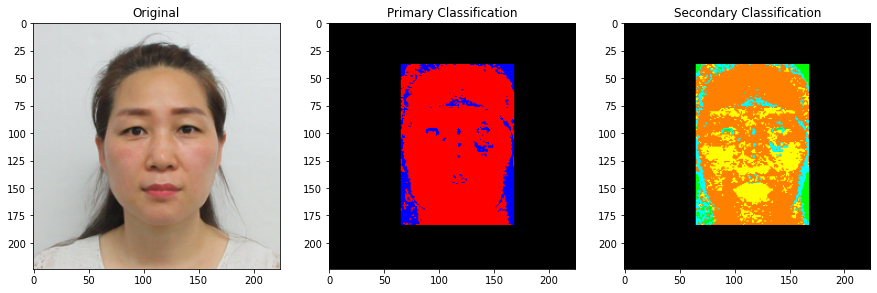

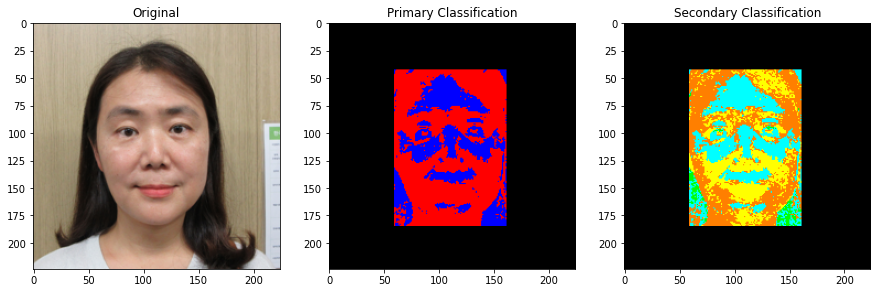

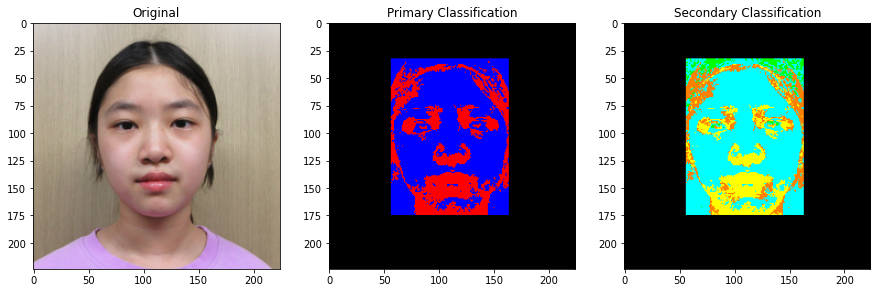

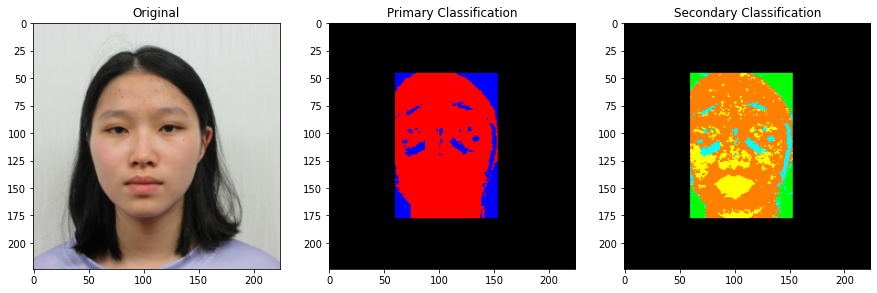

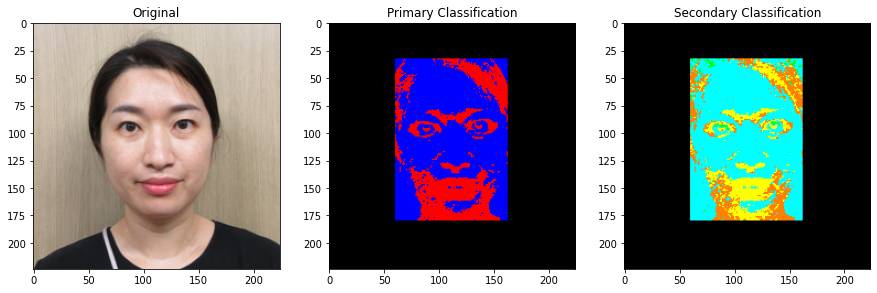

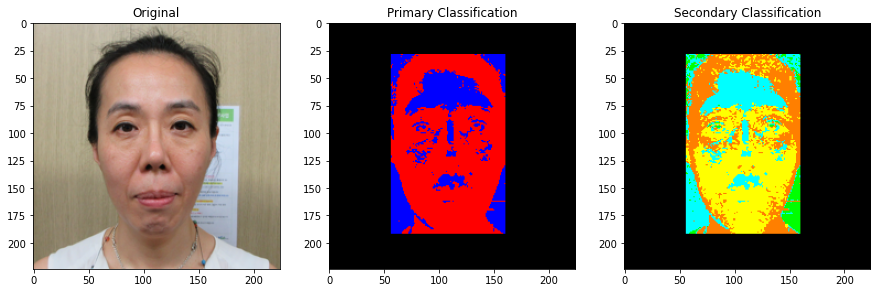

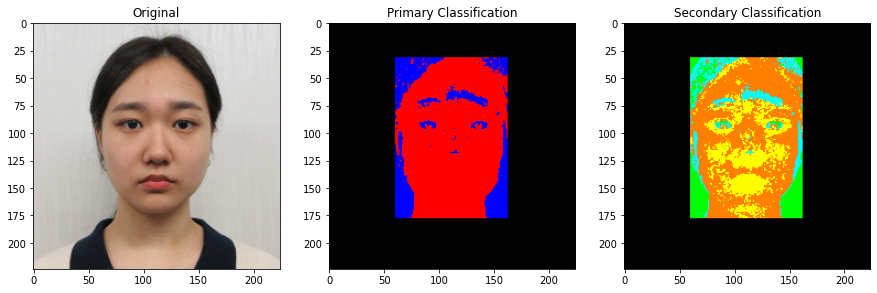

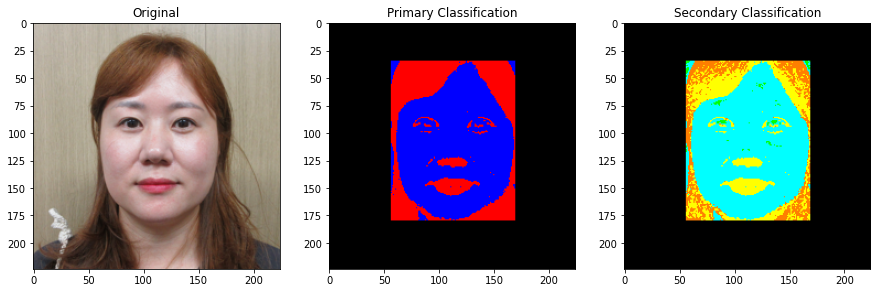

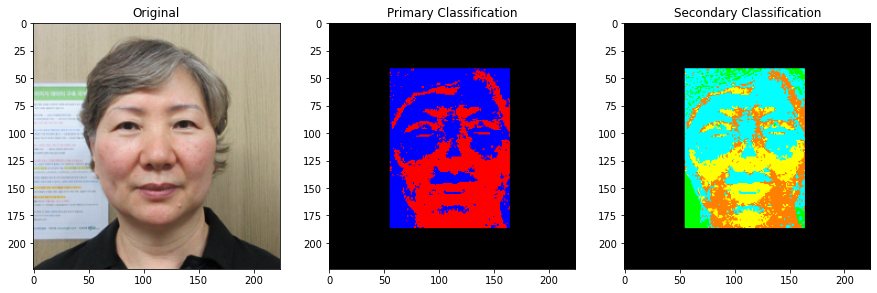

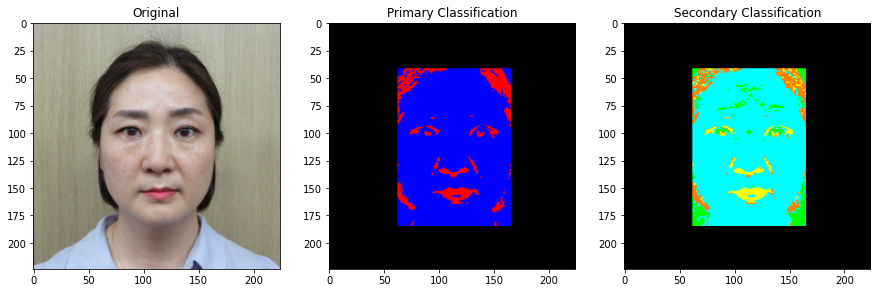

In [22]:
from mtcnn import MTCNN
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np

# Initialize MTCNN's face detector
detector = MTCNN()

for file in files:
    file_path = os.path.join(directory, file)
    
    # Load and resize the image
    image = Image.open(file_path).resize((224, 224))
    image_np = np.array(image)

    # Detect faces in the image
    faces = detector.detect_faces(image_np)

    # Initialize the result images
    results_primary = np.zeros_like(image_np, dtype='uint8')
    results_secondary = np.zeros_like(image_np, dtype='uint8')

    for face in faces:
        # Get the bounding box of the face
        x, y, width, height = face['box']

        # Loop over the pixels in the face region
        for j in range(y, y + height):
            for i in range(x, x + width):
                # Ensure the pixel coordinates are within the bounds of the image
                if j < 0 or i < 0 or j >= image_np.shape[0] or i >= image_np.shape[1]:
                    continue

                current_pixel = image_np[j, i]
                primary_class, secondary_class = classify_skin_type(current_pixel)
                results_primary[j, i] = color_map_primary[primary_class]
                results_secondary[j, i] = color_map_secondary[secondary_class]

    # Create a new figure
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    # Add the original image to the first subplot
    ax[0].imshow(image_np)
    ax[0].set_title('Original')

    # Add the primary classified image to the second subplot
    ax[1].imshow(results_primary)
    ax[1].set_title('Primary Classification')

    # Add the secondary classified image to the third subplot
    ax[2].imshow(results_secondary)
    ax[2].set_title('Secondary Classification')

    # Display the plot
    plt.show()  


In [23]:
import cv2
import collections
from mtcnn import MTCNN

# Initialize MTCNN's face detector
detector = MTCNN()

def classify_images(files, directory):
    result_labels = []

    for file in files:
        file_path = os.path.join(directory, file)
        
        # Load and resize the image
        image = Image.open(file_path).resize((224, 224))
        image_np = np.array(image)

        # Detect faces in the image
        faces = detector.detect_faces(image_np)

        # Initialize the result images
        results_primary = np.zeros_like(image_np, dtype='uint8')
        results_secondary = np.zeros_like(image_np, dtype='uint8')

        # Keep track of the labels
        labels_primary = []
        labels_secondary = []

        for face in faces:
            # Get the bounding box of the face
            x, y, width, height = face['box']

            # Loop over the pixels in the face region
            for j in range(y, y + height):
                for i in range(x, x + width):
                    # Ensure the pixel coordinates are within the bounds of the image
                    if j < 0 or i < 0 or j >= image_np.shape[0] or i >= image_np.shape[1]:
                        continue

                    current_pixel = image_np[j, i]
                    primary_class, secondary_class = classify_skin_type(current_pixel)
                    results_primary[j, i] = color_map_primary[primary_class]
                    results_secondary[j, i] = color_map_secondary[secondary_class]

                    # Record the labels
                    labels_primary.append(primary_class)
                    labels_secondary.append(secondary_class)

        # Get the most common labels
        primary_label = collections.Counter(labels_primary).most_common(1)[0][0]
        secondary_label = collections.Counter(labels_secondary).most_common(1)[0][0]
        
        result_labels.append((primary_label, secondary_label))

    return result_labels

# Use function like this:
result_labels = classify_images(files, directory)

In [24]:
result_labels

[('warm', 'fall'),
 ('warm', 'fall'),
 ('cool', 'winter'),
 ('warm', 'fall'),
 ('cool', 'winter'),
 ('warm', 'spring'),
 ('warm', 'fall'),
 ('cool', 'winter'),
 ('cool', 'winter'),
 ('cool', 'winter')]

In [25]:
from mtcnn import MTCNN
import cv2
import collections

# Initialize MTCNN's face detector
detector = MTCNN()

def classify_images(files, directory):
    result_labels = []

    for file in files:
        file_path = os.path.join(directory, file)
        
        # Load and resize the image
        image = Image.open(file_path).resize((224, 224))
        image_np = np.array(image)

        # Detect faces in the image
        faces = detector.detect_faces(image_np)

        # Initialize the result images
        results_primary = np.zeros_like(image_np, dtype='uint8')
        results_secondary = np.zeros_like(image_np, dtype='uint8')

        # Keep track of the labels
        labels_secondary = []

        for face in faces:
            # Get the bounding box of the face
            x, y, width, height = face['box']

            # Loop over the pixels in the face region
            for j in range(y, y + height):
                for i in range(x, x + width):
                    # Ensure the pixel coordinates are within the bounds of the image
                    if j < 0 or i < 0 or j >= image_np.shape[0] or i >= image_np.shape[1]:
                        continue

                    current_pixel = image_np[j, i]
                    _, secondary_class = classify_skin_type(current_pixel)
                    results_secondary[j, i] = color_map_secondary[secondary_class]

                    # Record the labels
                    labels_secondary.append(secondary_class)

        # Get the most common labels
        secondary_label = collections.Counter(labels_secondary).most_common(1)[0][0]
        
        result_labels.append(secondary_label)

    return result_labels

# Use function like this:
result_labels = classify_images(files, directory)

In [17]:
result_labels

['fall',
 'fall',
 'spring',
 'winter',
 'spring',
 'spring',
 'fall',
 'fall',
 'fall',
 'fall']

### 폴더 분류

In [26]:
from mtcnn import MTCNN
import cv2
import collections
import os
import shutil

# Initialize MTCNN's face detector
detector = MTCNN()

def classify_images(files, directory):
    result_labels = []

    for file in files:
        file_path = os.path.join(directory, file)
        
        # Load and resize the image
        image = Image.open(file_path).resize((224, 224))
        image_np = np.array(image)

        # Detect faces in the image
        faces = detector.detect_faces(image_np)

        # Initialize the result images
        results_secondary = np.zeros_like(image_np, dtype='uint8')

        # Keep track of the labels
        labels_secondary = []

        for face in faces:
            # Get the bounding box of the face
            x, y, width, height = face['box']

            # Loop over the pixels in the face region
            for j in range(y, y + height):
                for i in range(x, x + width):
                    # Ensure the pixel coordinates are within the bounds of the image
                    if j < 0 or i < 0 or j >= image_np.shape[0] or i >= image_np.shape[1]:
                        continue

                    current_pixel = image_np[j, i]
                    _, secondary_class = classify_skin_type(current_pixel)
                    results_secondary[j, i] = color_map_secondary[secondary_class]

                    # Record the labels
                    labels_secondary.append(secondary_class)

        # Get the most common label
        secondary_label = collections.Counter(labels_secondary).most_common(1)[0][0]
        
        result_labels.append(secondary_label)
        
        # Create a new subfolder if it doesn't exist
        new_folder_path = os.path.join(directory, secondary_label)
        if not os.path.exists(new_folder_path):
            os.mkdir(new_folder_path)
        
        # Move the file to the new subfolder
        new_file_path = os.path.join(new_folder_path, file)
        shutil.move(file_path, new_file_path)
        
    return result_labels

# Use function like this:
result_labels = classify_images(files, directory)

In [27]:
result_labels

['fall',
 'fall',
 'winter',
 'fall',
 'winter',
 'spring',
 'fall',
 'winter',
 'winter',
 'winter']

-  분류 잘 됨